### Showing how imputation affects the results

In [1]:
import numpy as np
import pandas as pd

In [2]:
datadir = "/home/jamc/Data/GitHub/BetaAnalysis/data/"
imputed = datadir + "test_numpy_beagle_imputed.gz.test_numpy_beagle.gz.gprobs.gz"
beagle = datadir + "test_numpy_beagle.gz"
idf = pd.read_csv(imputed, compression='gzip', sep=' ', header=0, index_col=0)
bdf = pd.read_csv(beagle, compression='gzip', sep="\t", header=0, index_col=0)

In [4]:
idfs = idf.sample(n=50000)
bdfs = bdf.sample(n=50000)

In [6]:
del(idf)
del(bdf)

In [7]:
idfs.drop(idfs.columns[[0, 1]], axis=1, inplace=True)
bdfs.drop(bdfs.columns[[0, 1]], axis=1, inplace=True)

In [8]:
idfs.head()

,Ind0,Ind0.1,Ind0.2,Ind1,Ind1.1,Ind1.2,Ind2,Ind2.1,Ind2.2,Ind3,...,Ind166.2,Ind167,Ind167.1,Ind167.2,Ind168,Ind168.1,Ind168.2,Ind169,Ind169.1,Ind169.2
marker,,,,,,,,,,,,,,,,,,,,,
Bvchr1.sca001_4117600,1.0000,0.0000,0.0,1.0000,0.0000,0.0,1.0000,0.0000,0.0,1.0,...,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0,1.0,0.0,0.0
Bvchr1.sca001_7952042,0.9156,0.0844,0.0,0.9955,0.0045,0.0,1.0000,0.0000,0.0,1.0,...,0.0000,1.0000,0.0000,0.0000,0.9864,0.0136,0.0,1.0,0.0,0.0
Bvchr1.sca001_6443788,1.0000,0.0000,0.0,1.0000,0.0000,0.0,1.0000,0.0000,0.0,1.0,...,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0,1.0,0.0,0.0
Bvchr1.sca001_3768034,1.0000,0.0000,0.0,1.0000,0.0000,0.0,1.0000,0.0000,0.0,1.0,...,0.0000,1.0000,0.0000,0.0000,0.9983,0.0017,0.0,1.0,0.0,0.0
Bvchr1.sca001_390927,1.0000,0.0000,0.0,1.0000,0.0000,0.0,0.9934,0.0066,0.0,1.0,...,0.0002,0.9587,0.0408,0.0005,0.9988,0.0012,0.0,1.0,0.0,0.0


In [9]:
bdfs.head()

,Ind0,Ind0.1,Ind0.2,Ind1,Ind1.1,Ind1.2,Ind2,Ind2.1,Ind2.2,Ind3,...,Ind166.2,Ind167,Ind167.1,Ind167.2,Ind168,Ind168.1,Ind168.2,Ind169,Ind169.1,Ind169.2
markers,,,,,,,,,,,,,,,,,,,,,
Bvchr1.sca001_2278618,0.998009,0.001991,0.0,0.799113,0.200728,0.000159,0.888184,0.111816,0.0,0.940649,...,0.000000,0.665860,0.333720,0.000420,0.666111,0.333847,0.000042,0.940649,0.059351,0.000000
Bvchr1.sca001_3257197,0.799240,0.200760,0.0,0.969347,0.030653,0.000000,0.940649,0.059351,0.0,0.799240,...,0.333333,0.333333,0.333333,0.333333,0.799239,0.200760,0.000001,0.333333,0.333333,0.333333
Bvchr1.sca001_6367775,0.992119,0.007881,0.0,0.999001,0.000999,0.000000,0.940649,0.059351,0.0,0.888184,...,0.000000,0.992119,0.007881,0.000000,0.969347,0.030653,0.000000,0.000000,0.015602,0.984398
Bvchr1.sca001_2809006,0.969347,0.030653,0.0,0.984398,0.015602,0.000000,0.500000,0.500000,0.0,0.969347,...,0.333333,0.333333,0.333333,0.333333,0.666111,0.333847,0.000042,0.799240,0.200760,0.000000
Bvchr1.sca001_2103670,0.940649,0.059351,0.0,0.660600,0.331084,0.008316,0.888184,0.111816,0.0,0.799239,...,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333


In [10]:
idx1 = []
# argument to range has to be integer
ninds = int(idfs.shape[1]/3)
for x in range(0,ninds):
    idx = "Ind%03d" % x
    idx1 += [idx, idx, idx]
idx1 = np.array(idx1)
idx2 = np.array([0,1,2]*ninds)
arrays = [idx1, idx2]
idx2.shape

(510,)

In [12]:
bmat = bdfs.as_matrix().T
imat = idfs.as_matrix().T

bdf = pd.DataFrame(bmat, index=arrays)
idf = pd.DataFrame(imat, index=arrays)

bdf.columns = list(bdfs.T)
idf.columns = list(idfs.T)

multiidx = pd.MultiIndex.from_arrays(arrays, names = ["Individual", "Genotype"])
bdf = pd.DataFrame(bmat.T, index=list(bdfs.T), columns=multiidx)
idf = pd.DataFrame(imat.T, index=list(idfs.T), columns=multiidx)

In [14]:
bdf.head()
bdf.shape

(50000, 510)

In [27]:
# weighted average of number of ALT alleles by Genotype Likelihoods
nind = int(bdf.shape[1]/3)
nvar = 50000
xbdf = bdf*np.array([0,1,2]*nind)
xidf = idf*np.array([0,1,2]*nind)

In [18]:
xbdf.head()

Individual            Ind000                Ind001                     Ind002  \
Genotype                   0         1    2      0         1         2      0   
Bvchr1.sca001_2278618    0.0  0.001991  0.0    0.0  0.200728  0.000318    0.0   
Bvchr1.sca001_3257197    0.0  0.200760  0.0    0.0  0.030653  0.000000    0.0   
Bvchr1.sca001_6367775    0.0  0.007881  0.0    0.0  0.000999  0.000000    0.0   
Bvchr1.sca001_2809006    0.0  0.030653  0.0    0.0  0.015602  0.000000    0.0   
Bvchr1.sca001_2103670    0.0  0.059351  0.0    0.0  0.331084  0.016632    0.0   

Individual                           Ind003    ...       Ind166 Ind167  \
Genotype                      1    2      0    ...            2      0   
Bvchr1.sca001_2278618  0.111816  0.0    0.0    ...     0.000000    0.0   
Bvchr1.sca001_3257197  0.059351  0.0    0.0    ...     0.666666    0.0   
Bvchr1.sca001_6367775  0.059351  0.0    0.0    ...     0.000000    0.0   
Bvchr1.sca001_2809006  0.500000  0.0    0.0    ...     0.666666    0.0   
Bvchr1.sca001_2103670  0.111816  0.0    0.0    ...     0.666666    0.0   

Individual                                Ind168                     Ind169  \
Genotype                      1         2      0         1         2      0   
Bvchr1.sca001_2278618  0.333720  0.000840    0.0  0.333847  0.000084    0.0   
Bvchr1.sca001_3257197  0.333333  0.666666    0.0  0.200760  0.000002    0.0   
Bvchr1.sca001_6367775  0.007881  0.000000    0.0  0.030653  0.000000    0.0   
Bvchr1.sca001_2809006  0.333333  0.666666    0.0  0.333847  0.000084    0.0   
Bvchr1.sca001_2103670  0.333333  0.666666    0.0  0.333333  0.666666    0.0   

Individual                                 
Genotype                      1         2  
Bvchr1.sca001_2278618  0.059351  0.000000  
Bvchr1.sca001_3257197  0.333333  0.666666  
Bvchr1.sca001_6367775  0.015602  1.968796  
Bvchr1.sca001_2809006  0.200760  0.000000  
Bvchr1.sca001_2103670  0.333333  0.666666  

[5 rows x 510 columns]

In [19]:
# no idea why this doesn't work if it is not transposed
# sum number of alleles within each individual
abdf = xbdf.T.groupby(by='Individual').apply(func=np.sum).T
aidf = xidf.T.groupby(by='Individual').apply(func=np.sum).T

abdf.head()

Individual,Ind000,Ind001,Ind002,Ind003,Ind004,Ind005,Ind006,Ind007,Ind008,Ind009,...,Ind160,Ind161,Ind162,Ind163,Ind164,Ind165,Ind166,Ind167,Ind168,Ind169
Bvchr1.sca001_2278618,0.001991,0.201046,0.111816,0.059351,0.015602,0.200760,0.333896,0.200760,0.200760,0.999999,...,0.000999,0.030653,0.015602,0.059351,0.200760,0.111816,0.200760,0.334560,0.333931,0.059351
Bvchr1.sca001_3257197,0.200760,0.030653,0.059351,0.200760,0.347716,0.059351,0.000999,0.015602,0.333896,0.999999,...,0.333931,0.999999,0.999999,0.059351,0.999999,0.200760,0.999999,0.999999,0.200762,0.999999
Bvchr1.sca001_6367775,0.007881,0.000999,0.059351,0.111816,0.200762,0.003965,0.136807,0.007881,0.007881,0.015602,...,0.111816,0.200760,0.059351,0.200760,0.111816,0.000999,0.015602,0.007881,0.030653,1.984398
Bvchr1.sca001_2809006,0.030653,0.015602,0.500000,0.030653,0.111816,0.059351,0.000999,0.059351,0.111816,0.200762,...,0.999999,0.999999,0.999999,0.111816,0.999999,0.999999,0.999999,0.999999,0.333931,0.200760
Bvchr1.sca001_2103670,0.059351,0.347716,0.111816,0.200762,0.111816,0.200762,0.111816,0.059351,0.347716,0.111816,...,0.999999,0.999999,0.999999,0.111816,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999


In [34]:
bea_q = abdf.mean(axis=1)/2
imp_q = aidf.mean(axis=1)/2

bea_Hs = 2*(1-bea_q)*bea_q
imp_Hs = 2*(1-imp_q)*imp_q

beagle_GT = bdf.T.groupby(by='Genotype')
impute_GT = idf.T.groupby(by='Genotype')

bea_AA = beagle_GT.apply(axis=0, func=np.mean).T[0]
bea_Aa = beagle_GT.apply(axis=0, func=np.mean).T[1]
bea_aa = beagle_GT.apply(axis=0, func=np.mean).T[2]

imp_AA = impute_GT.apply(axis=0, func=np.mean).T[0]
imp_Aa = impute_GT.apply(axis=0, func=np.mean).T[1]
imp_aa = impute_GT.apply(axis=0, func=np.mean).T[2]

db = {
    "BEA_AF": bea_q,
    "BEA_AA": bea_AA,
    "BEA_Aa": bea_Aa,
    "BEA_aa": bea_aa,
    "BEA_HS": bea_Hs,
}
di = {
    "IMP_AF": imp_q,
    "IMP_AA": imp_AA,
    "IMP_Aa": imp_Aa,
    "IMP_aa": imp_aa,
    "IMP_HS": imp_Hs
}

bdata = pd.DataFrame(data=db)
idata = pd.DataFrame(data=di)

In [37]:
bdata.head()

,BEA_AA,BEA_AF,BEA_Aa,BEA_HS,BEA_aa
Bvchr1.sca001_2278618,0.875661,0.070457,0.107763,0.130986,0.016575
Bvchr1.sca001_3257197,0.794874,0.129545,0.151162,0.225526,0.053964
Bvchr1.sca001_6367775,0.910932,0.049489,0.079158,0.094079,0.009910
Bvchr1.sca001_2809006,0.776380,0.142676,0.161887,0.244640,0.061733
Bvchr1.sca001_2103670,0.751946,0.166865,0.162379,0.278042,0.085676


In [36]:
idata.head()

,IMP_AA,IMP_AF,IMP_Aa,IMP_HS,IMP_aa
Bvchr1.sca001_4117600,0.988235,0.008824,0.005882,0.017491,0.005882
Bvchr1.sca001_7952042,0.925575,0.048745,0.051361,0.092737,0.023064
Bvchr1.sca001_6443788,0.987665,0.006167,0.012335,0.012259,0.000000
Bvchr1.sca001_3768034,0.980871,0.011834,0.014590,0.023389,0.004539
Bvchr1.sca001_390927,0.976052,0.012237,0.023424,0.024174,0.000525


In [38]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# define matplotlib plotting functions
def mpl_plot_hwe(af, gf0, gf1, gf2, ax, title="HW Plot", xlabel="Allele Frequency", ylabel="Genotype Frequency"):
    x_array = np.linspace(0,1,1000) # For the Plot
    
    # # prepare expected genotype freqs.
    y_00 = x_array**2
    y_01 = 2*x_array*(1-x_array)
    y_02 = (1-x_array)**2

    ax.scatter(af, gf0, marker='o', color='firebrick', alpha=0.55, facecolor='None', label="AA")
    ax.scatter(af, gf1, marker='o', color='green', alpha=0.55, facecolor='None', label="Aa")
    ax.scatter(af, gf2, marker='o', color='orange', alpha=0.55, facecolor='None', label="aa")
    ax.plot(x_array, y_00, color='black', linestyle='--', label="Exp")
    ax.plot(x_array, y_01, color='black', linestyle='--')
    ax.plot(x_array, y_02, color='black', linestyle='--')
    
    mean_g00 = lowess(gf0, af, is_sorted=False, frac=0.025, it=0)
    mean_g01 = lowess(gf1, af, is_sorted=False, frac=0.025, it=0)
    mean_g11 = lowess(gf2, af, is_sorted=False, frac=0.025, it=0)

    ax.plot(mean_g00[:,0], mean_g00[:,1], color='black', label="Mean")
    ax.plot(mean_g01[:,0], mean_g01[:,1], color='black')
    ax.plot(mean_g11[:,0], mean_g11[:,1], color='black')
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    leg = ax.legend()
    for lh in leg.legendHandles: 
        lh.set_alpha(1)

        
def mpl_plot_fis(afreqs, obs_het, nbins, ax, title=r"$F_{IS}$ Fitting", ylabel="Heterozygosity", xlabel="Allele Freq."):
    # preparing x values for allele freqs and some bins
    x_array = np.linspace(0,1,1000) # For the Plot
    bins = np.linspace(0,1,nbins) # Make your Bins.
    
    hz_means, bin_edges, _ = binned_statistic(
        afreqs, obs_het, statistic='mean', bins=bins
    )
    
    # middle of each of the bins
    bin_means = (bin_edges[1:] + bin_edges[:-1])/2.0
    
    # prepare some y values for visualization
    y_00 = 2*x_array*(1-x_array) # Expected Heterozygosity
    y_01 = 2*x_array*(1-x_array) * 0.2 # For F_IS=0.8
    y_02 = 2*x_array*(1-x_array) * 0.05 # For F_IS=0.94
    y_03 = 2*x_array*(1-x_array) * 0.02 # For F_IS=0.98
    
    def Fis(x, F):
        return 2*x*(1-x)*(1-F)
    
    # fit FIS for each population level
    fit_popt, fit_pcov = curve_fit(Fis, afreqs, obs_het)
    # prepare the y values for the fitted F
    fit_fis = fit_popt[0]
    y_fit = 2*x_array*(1-x_array) * (1-fit_fis)

    ax.plot(x_array, y_00, color='firebrick', label=r"$F_{IS}=0.0$")
    ax.plot(x_array, y_01, color='orange', label=r"$F_{IS}=0.8$")
    ax.plot(x_array, y_02, color='green', label=r"$F_{IS}=0.95$")
    ax.plot(x_array, y_03, color='navy', label=r"$F_{IS}=0.98$")
    ax.plot(x_array, y_fit, color='black', linestyle='--', label=r"Fit $F_{IS}=%s$" % (round(fit_fis, 2)))
    ax.scatter(bin_means, hz_means, marker='o', color='navy', alpha=0.95, facecolor='None', label="Obs")
    ax.set_yscale('log')
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    leg = ax.legend()
    for lh in leg.legendHandles: 
        lh.set_alpha(1)


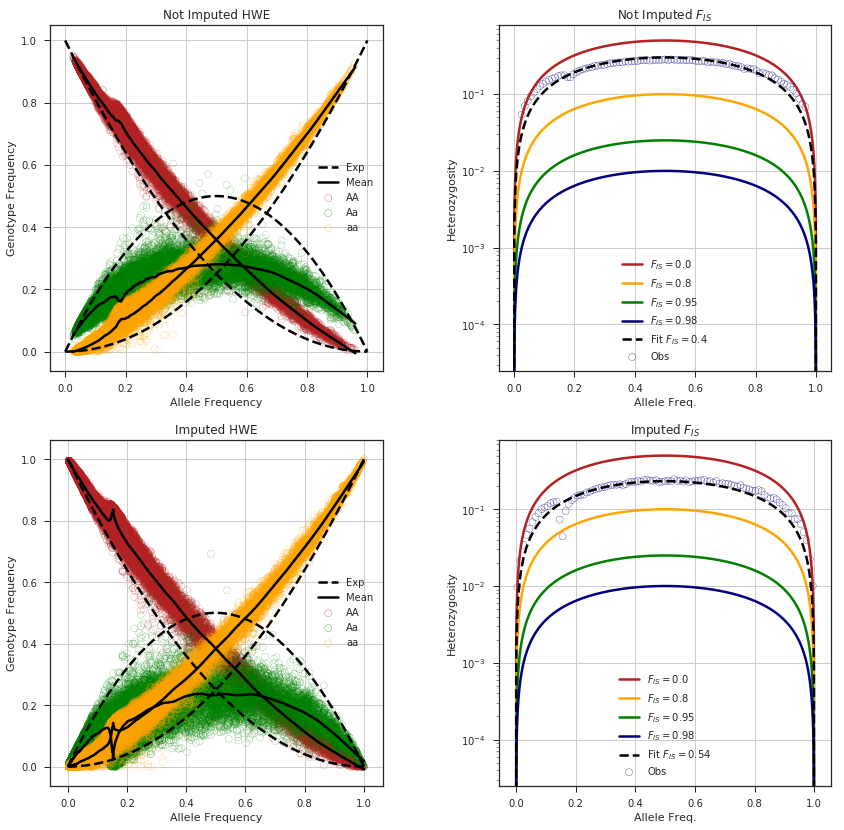

In [40]:
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.optimize import curve_fit
from scipy.stats import binned_statistic

fig, ax = plt.subplots(figsize=(14,14), ncols=2, nrows=2)
# sns.set_style("whitegrid")
sns.set_style("ticks", {"axes.grid": True})
plt.subplots_adjust(wspace=0.35)
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

mpl_plot_hwe(bdata["BEA_AF"], bdata["BEA_AA"], bdata["BEA_Aa"], bdata["BEA_aa"], ax[0][0], title="Not Imputed HWE")
mpl_plot_fis(bdata["BEA_AF"], bdata["BEA_Aa"], 100, ax[0][1], title=r"Not Imputed $F_{IS}$")
mpl_plot_hwe(idata["IMP_AF"], idata["IMP_AA"], idata["IMP_Aa"], idata["IMP_aa"], ax[1][0], title="Imputed HWE")
mpl_plot_fis(idata["IMP_AF"], idata["IMP_Aa"], 100, ax[1][1], title=r"Imputed $F_{IS}$")
